In [10]:
#Part 1

Text(0.5, 0, 'Number of Postings')

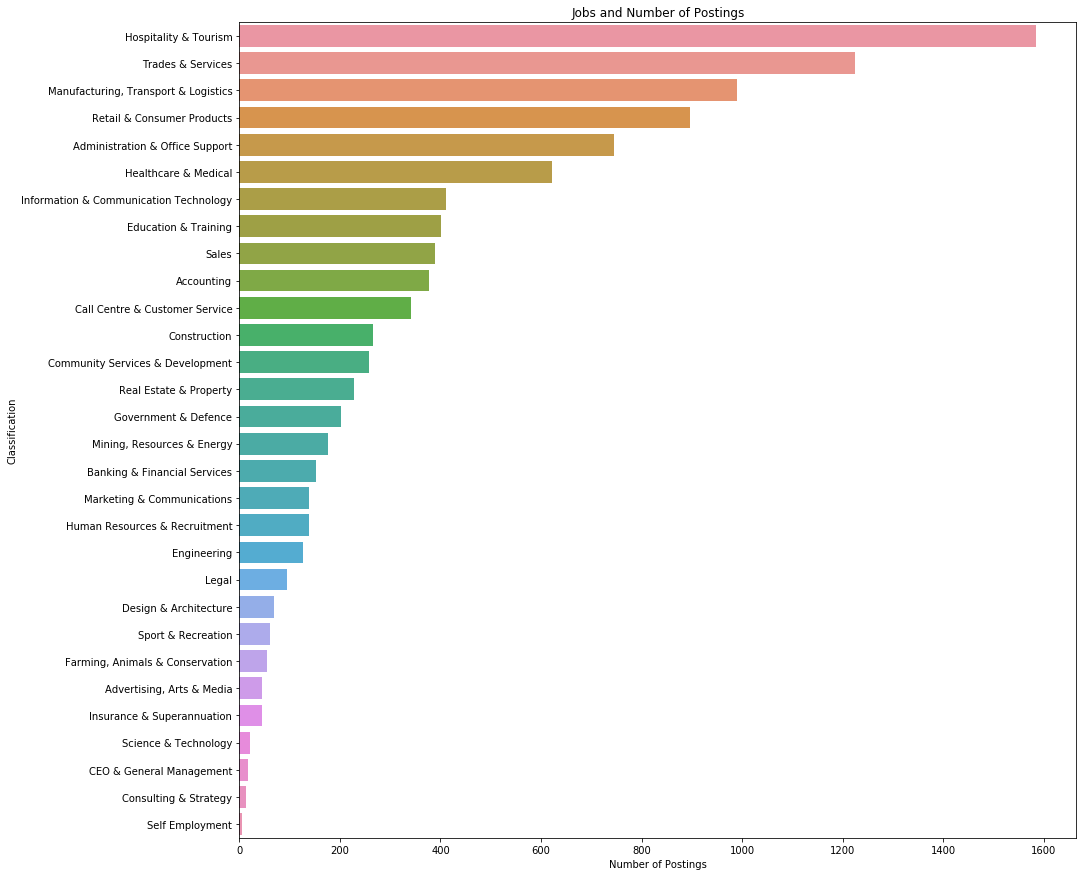

In [31]:
#Example

In [1]:
#My Attempt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import seaborn as sns
%matplotlib inline

job = pd.read_csv('job-market(3).csv')
job.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
1,37404337.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
2,37404356.0,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0.0,30.0,NaN
3,37404330.0,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0.0,30.0,NaN
4,37404308.0,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0.0,30.0,NaN


[Text(0.5, 0, 'Number of jobs'),
 Text(0, 0.5, 'Location'),
 Text(0.5, 1.0, 'Jobs and Number of Postings')]

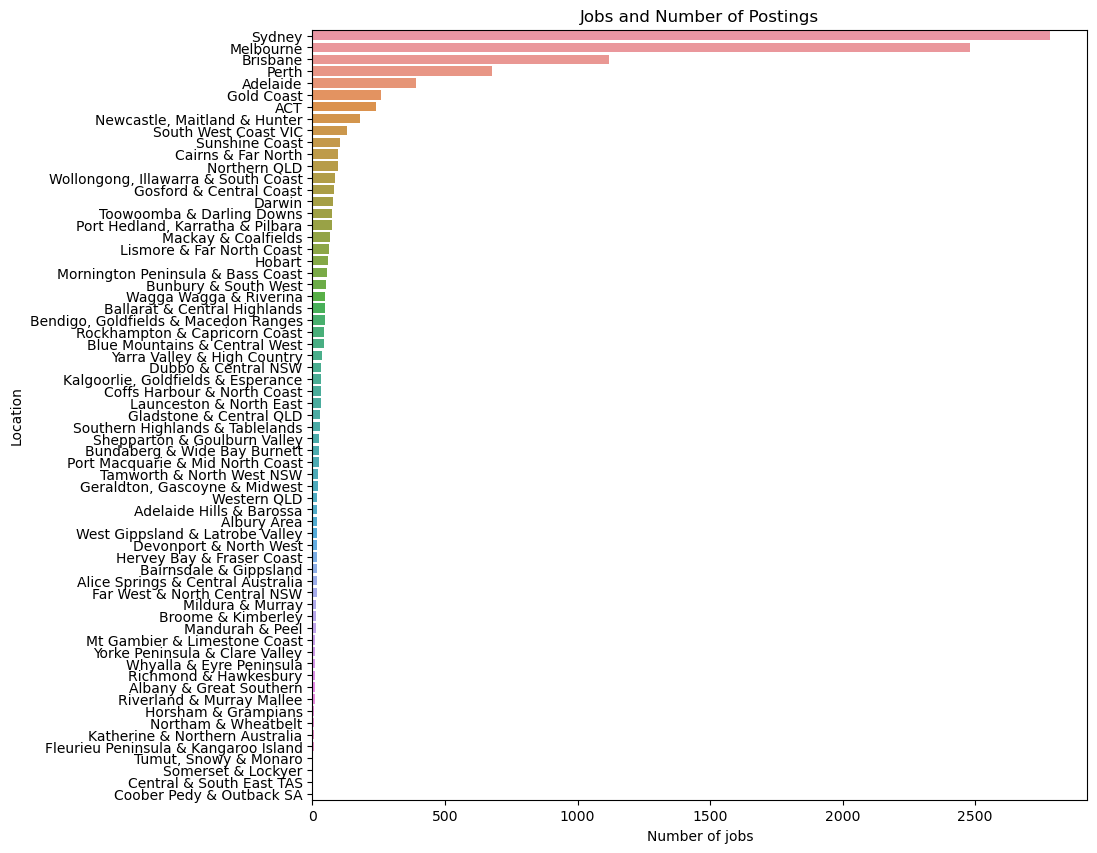

In [2]:
#My Attempt
#Plot based on number of jobs by job classification

plt.figure(figsize=(10,10))
classification = sns.countplot(y='Location', data=job, order=job['Location'].value_counts().index)
classification.set(xlabel ='Number of jobs', ylabel = 'Location', title ='Jobs and Number of Postings')

In [11]:
#Part 2

In [9]:
#Example
#create dataframe for salary ranges

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,HighestSalary,JobType,Label,Count
LowestSalary,,,,,,,,,,,,,,
0.0,3894,3894,3571,3894,3894,2560,3894,3894,3894,3737,3894,3740,0.0,3894
30.0,1842,1842,1779,1842,1842,1082,1842,1842,1842,1815,1842,1816,30.0,1842
40.0,2519,2519,2373,2519,2519,1516,2519,2519,2519,2474,2519,2475,40.0,2519
50.0,1844,1844,1760,1844,1844,1234,1844,1844,1844,1817,1844,1821,50.0,1844


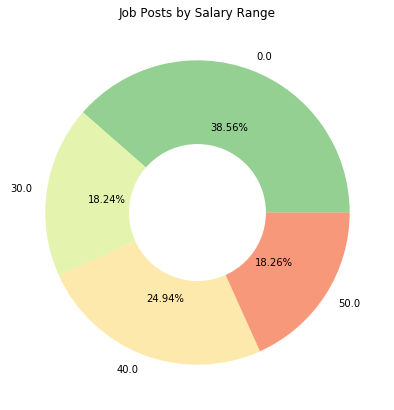

In [43]:
#Example
#salary ranges plot

In [42]:
#My Attempt

SalRange = job[job['LowestSalary'].isna()==False]
SalRange = SalRange[SalRange['LowestSalary'].isna()==False]
SalRange['SalaryRange'] = SalRange['LowestSalary']
for i in range(len(SalRange)):
    SalRange['SalaryRange'][i] = str(SalRange['LowestSalary'][i]) + '-' + str(SalRange['HighestSalary'][i])

SalRange = SalRange.groupby('SalaryRange').count()
SalRange['SalaryRange'] = SalRange.index
SalRange['Count'] = SalRange["Id"]

SalRange.head()

C:\Users\Zach's PC\AppData\Local\Temp\ipykernel_21160\2758819082.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SalRange['SalaryRange'][i] = str(SalRange['LowestSalary'][i]) + '-' + str(SalRange['HighestSalary'][i])


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,SalaryRange,Count
SalaryRange,,,,,,,,,,,,,,,
0.0-30.0,3894,3894,3571,3894,3894,2560,3894,3894,3894,3737,3894,3894,3740,0.0-30.0,3894
30.0-40.0,1842,1842,1779,1842,1842,1082,1842,1842,1842,1815,1842,1842,1816,30.0-40.0,1842
40.0-50.0,2519,2519,2373,2519,2519,1516,2519,2519,2519,2474,2519,2519,2475,40.0-50.0,2519
50.0-60.0,1844,1844,1760,1844,1844,1234,1844,1844,1844,1817,1844,1844,1821,50.0-60.0,1844


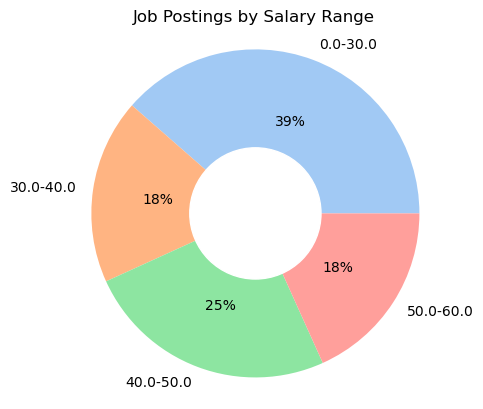

In [43]:
#My Attempt

fig, ax = plt.subplots()

colours = sns.color_palette('pastel')[0:4]

ax.pie(SalRange['Count'], labels=SalRange['SalaryRange'], colors=colours, autopct='%.0f%%')
ax.add_patch(plt.Circle((0, 0), 0.4, color='white'))
ax.set_title('Job Postings by Salary Range')
ax.autoscale()